In [21]:
import json

# Step 1: Open and read the JSON file
with open("/home/cc/AutomaticWorkflowGeneration/ActionEngine/eval/answers/test_endtoend/result.json", 'r') as file:
    data = json.load(file)

## Total Score

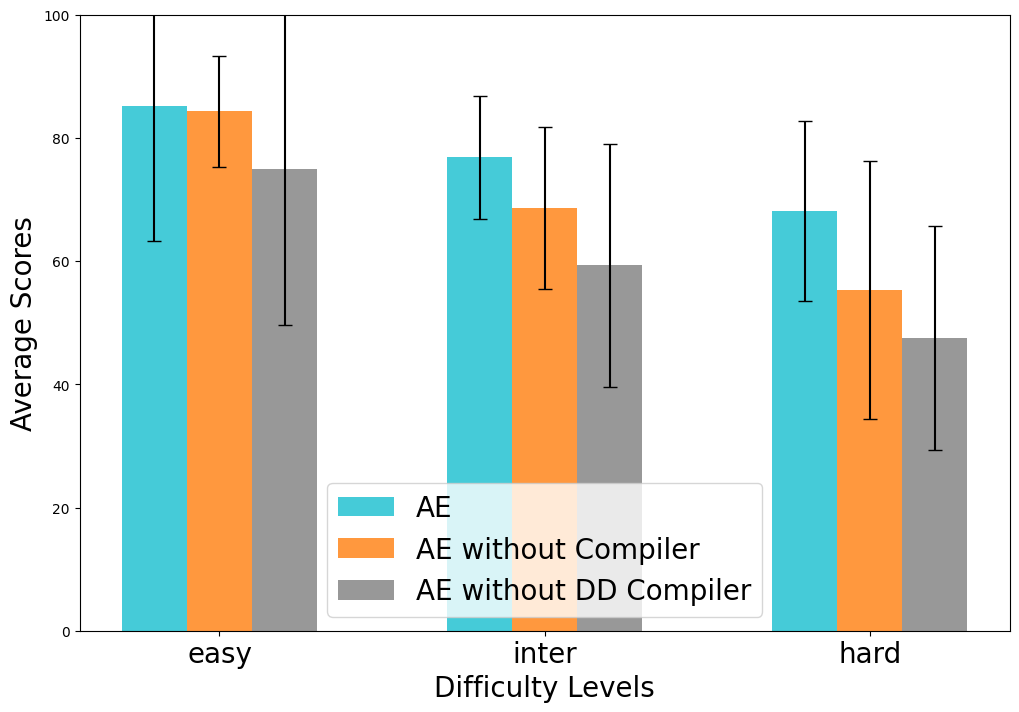

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats

# Difficulty levels
difficulty_levels = ["easy", "inter", "hard"]

# Function to calculate average excluding -Infinity
def average(scores):
    valid_scores = [score for score in scores if not math.isinf(score)]
    return sum(valid_scores) / len(valid_scores) if valid_scores else float('nan')

# Function to calculate standard error
def standard_error(scores):
    valid_scores = [score for score in scores if not math.isinf(score)]
    if len(valid_scores) > 1:
        return stats.sem(valid_scores)
    else:
        return float('nan')

# Function to calculate confidence interval (95%)
def confidence_interval(sem, n):
    h = sem * stats.t.ppf((1 + 0.95) / 2., n-1)  # 95% confidence
    return h

# Calculate the average scores and confidence intervals for each setting and difficulty level
ae_avg = [average(data["ae"][level]["total_score"]) for level in difficulty_levels]
ae_sem = [standard_error(data["ae"][level]["total_score"]) for level in difficulty_levels]
ae_ci = [confidence_interval(sem, len(data["ae"][level]["total_score"])) for sem, level in zip(ae_sem, difficulty_levels)]

ae_wo_compiler_avg = [average(data["ae_wo_compiler"][level]["total_score"]) for level in difficulty_levels]
ae_wo_compiler_sem = [standard_error(data["ae_wo_compiler"][level]["total_score"]) for level in difficulty_levels]
ae_wo_compiler_ci = [confidence_interval(sem, len(data["ae_wo_compiler"][level]["total_score"])) for sem, level in zip(ae_wo_compiler_sem, difficulty_levels)]

ae_wo_dd_compiler_avg = [average(data["ae_wo_dd_compiler"][level]["total_score"]) for level in difficulty_levels]
ae_wo_dd_compiler_sem = [standard_error(data["ae_wo_dd_compiler"][level]["total_score"]) for level in difficulty_levels]
ae_wo_dd_compiler_ci = [confidence_interval(sem, len(data["ae_wo_dd_compiler"][level]["total_score"])) for sem, level in zip(ae_wo_dd_compiler_sem, difficulty_levels)]

# X axis for difficulty levels
x = np.arange(len(difficulty_levels))

# Width of the bars
bar_width = 0.2

# Plotting the histograms for each setting
fig, ax = plt.subplots(figsize=(12, 8))

colors = ['#17becf', '#ff7f0e', '#7f7f7f'] # Blue, Orange, Green

# Creating bars for each setting with specified colors
ax.bar(x - bar_width, ae_avg, yerr=ae_ci, width=bar_width, label="AE", align="center", capsize=5, color=colors[0], alpha=0.8)
ax.bar(x, ae_wo_compiler_avg, yerr=ae_wo_compiler_ci, width=bar_width, label="AE without Compiler", align="center", capsize=5, color=colors[1], alpha=0.8)
ax.bar(x + bar_width, ae_wo_dd_compiler_avg, yerr=ae_wo_dd_compiler_ci, width=bar_width, label="AE without DD Compiler", align="center", capsize=5, color=colors[2], alpha=0.8)

# Adding labels and titles with larger font size
ax.set_xlabel("Difficulty Levels", fontsize=20)
ax.set_ylabel("Average Scores", fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(difficulty_levels, fontsize=20)
ax.legend(fontsize=20)

# Limiting the Y-axis to 100
ax.set_ylim(0, 100)

plt.savefig('./figures/average_scores.pdf', format='pdf', bbox_inches='tight')

# Display the plot
plt.show()


## Func Selection

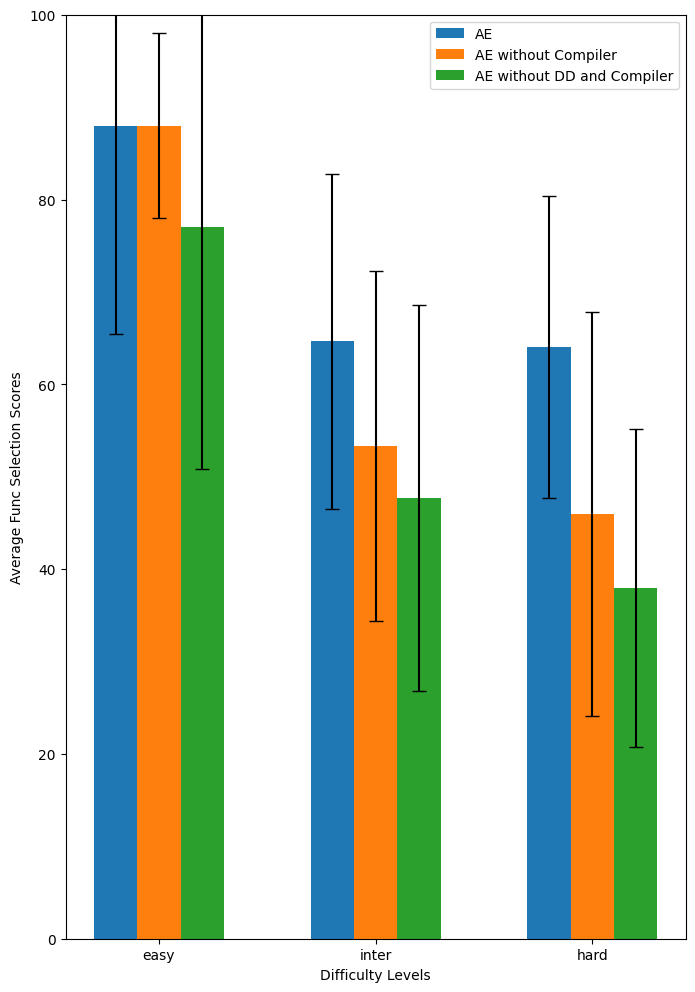

In [43]:
# Difficulty levels
difficulty_levels = ["easy", "inter", "hard"]

# Function to calculate average excluding -Infinity
def average(scores):
    valid_scores = [score for score in scores if not math.isinf(score)]
    return sum(valid_scores) / len(valid_scores) if valid_scores else float('nan')

# Function to calculate standard error
def standard_error(scores):
    valid_scores = [score for score in scores if not math.isinf(score)]
    if len(valid_scores) > 1:
        return stats.sem(valid_scores)
    else:
        return float('nan')

# Function to calculate confidence interval (95%)
def confidence_interval(sem, n):
    h = sem * stats.t.ppf((1 + 0.95) / 2., n-1)  # 95% confidence
    return h

# Calculate the average scores and confidence intervals for each setting and difficulty level
ae_avg = [average(data["ae"][level]["func_score"]) for level in difficulty_levels]
ae_sem = [standard_error(data["ae"][level]["func_score"]) for level in difficulty_levels]
ae_ci = [confidence_interval(sem, len(data["ae"][level]["func_score"])) for sem, level in zip(ae_sem, difficulty_levels)]

ae_wo_compiler_avg = [average(data["ae_wo_compiler"][level]["func_score"]) for level in difficulty_levels]
ae_wo_compiler_sem = [standard_error(data["ae_wo_compiler"][level]["func_score"]) for level in difficulty_levels]
ae_wo_compiler_ci = [confidence_interval(sem, len(data["ae_wo_compiler"][level]["func_score"])) for sem, level in zip(ae_wo_compiler_sem, difficulty_levels)]

ae_wo_dd_compiler_avg = [average(data["ae_wo_dd_compiler"][level]["func_score"]) for level in difficulty_levels]
ae_wo_dd_compiler_sem = [standard_error(data["ae_wo_dd_compiler"][level]["func_score"]) for level in difficulty_levels]
ae_wo_dd_compiler_ci = [confidence_interval(sem, len(data["ae_wo_dd_compiler"][level]["func_score"])) for sem, level in zip(ae_wo_dd_compiler_sem, difficulty_levels)]

# X axis for difficulty levels
x = np.arange(len(difficulty_levels))

# Width of the bars
bar_width = 0.2

# Plotting the histograms for each setting
fig, ax = plt.subplots(figsize=(8, 12))

# Creating bars for each setting with error bars
ax.bar(x - bar_width, ae_avg, yerr=ae_ci, width=bar_width, label="AE", align="center", capsize=5)
ax.bar(x, ae_wo_compiler_avg, yerr=ae_wo_compiler_ci, width=bar_width, label="AE without Compiler", align="center", capsize=5)
ax.bar(x + bar_width, ae_wo_dd_compiler_avg, yerr=ae_wo_dd_compiler_ci, width=bar_width, label="AE without DD and Compiler", align="center", capsize=5)

# Adding labels and titles
ax.set_xlabel("Difficulty Levels")
ax.set_ylabel("Average Func Selection Scores")
# ax.set_title("Average Func Selection Scores by Difficulty Level for Different Settings")
ax.set_xticks(x)
ax.set_xticklabels(difficulty_levels)
ax.legend()

# Limiting the Y-axis to 100
ax.set_ylim(0, 100)

# Display the plot
plt.show()

## Topological Ordering

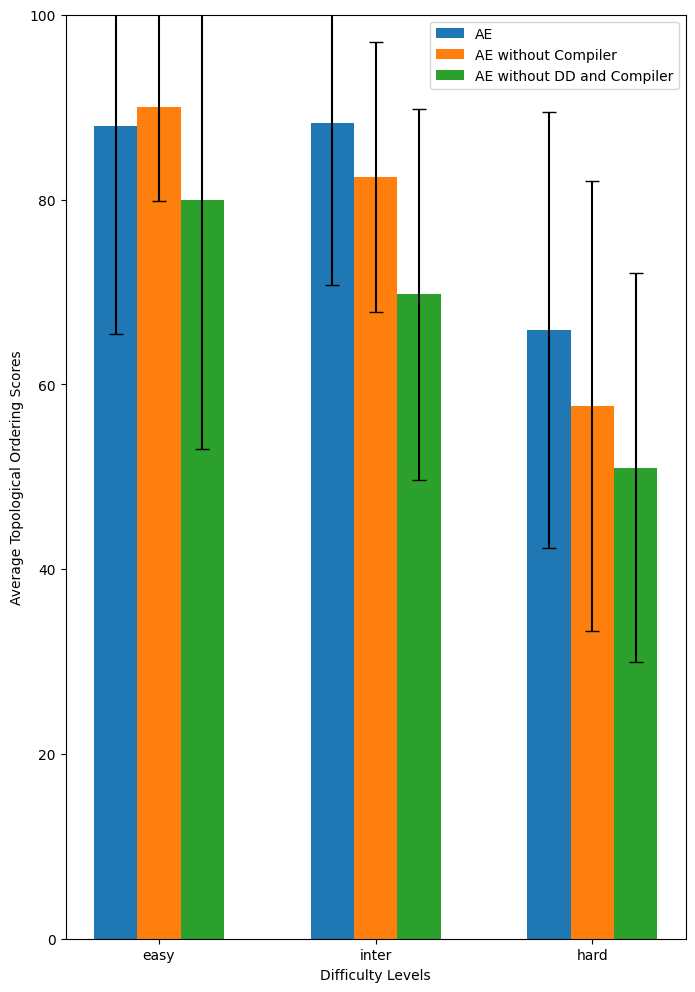

In [44]:
# Difficulty levels
difficulty_levels = ["easy", "inter", "hard"]

# Function to calculate average excluding -Infinity
def average(scores):
    valid_scores = [score for score in scores if not math.isinf(score)]
    return sum(valid_scores) / len(valid_scores) if valid_scores else float('nan')

# Function to calculate standard error
def standard_error(scores):
    valid_scores = [score for score in scores if not math.isinf(score)]
    if len(valid_scores) > 1:
        return stats.sem(valid_scores)
    else:
        return float('nan')

# Function to calculate confidence interval (95%)
def confidence_interval(sem, n):
    h = sem * stats.t.ppf((1 + 0.95) / 2., n-1)  # 95% confidence
    return h

# Calculate the average scores and confidence intervals for each setting and difficulty level
ae_avg = [average(data["ae"][level]["topological_ordering"]) for level in difficulty_levels]
ae_sem = [standard_error(data["ae"][level]["topological_ordering"]) for level in difficulty_levels]
ae_ci = [confidence_interval(sem, len(data["ae"][level]["topological_ordering"])) for sem, level in zip(ae_sem, difficulty_levels)]

ae_wo_compiler_avg = [average(data["ae_wo_compiler"][level]["topological_ordering"]) for level in difficulty_levels]
ae_wo_compiler_sem = [standard_error(data["ae_wo_compiler"][level]["topological_ordering"]) for level in difficulty_levels]
ae_wo_compiler_ci = [confidence_interval(sem, len(data["ae_wo_compiler"][level]["topological_ordering"])) for sem, level in zip(ae_wo_compiler_sem, difficulty_levels)]

ae_wo_dd_compiler_avg = [average(data["ae_wo_dd_compiler"][level]["topological_ordering"]) for level in difficulty_levels]
ae_wo_dd_compiler_sem = [standard_error(data["ae_wo_dd_compiler"][level]["topological_ordering"]) for level in difficulty_levels]
ae_wo_dd_compiler_ci = [confidence_interval(sem, len(data["ae_wo_dd_compiler"][level]["topological_ordering"])) for sem, level in zip(ae_wo_dd_compiler_sem, difficulty_levels)]

# X axis for difficulty levels
x = np.arange(len(difficulty_levels))

# Width of the bars
bar_width = 0.2

# Plotting the histograms for each setting
fig, ax = plt.subplots(figsize=(8, 12))

# Creating bars for each setting with error bars
ax.bar(x - bar_width, ae_avg, yerr=ae_ci, width=bar_width, label="AE", align="center", capsize=5)
ax.bar(x, ae_wo_compiler_avg, yerr=ae_wo_compiler_ci, width=bar_width, label="AE without Compiler", align="center", capsize=5)
ax.bar(x + bar_width, ae_wo_dd_compiler_avg, yerr=ae_wo_dd_compiler_ci, width=bar_width, label="AE without DD and Compiler", align="center", capsize=5)

# Adding labels and titles
ax.set_xlabel("Difficulty Levels")
ax.set_ylabel("Average Topological Ordering Scores")
# ax.set_title("Average Topological Ordering Scores by Difficulty Level for Different Settings")
ax.set_xticks(x)
ax.set_xticklabels(difficulty_levels)
ax.legend()

# Limiting the Y-axis to 100
ax.set_ylim(0, 100)

# Display the plot
plt.show()

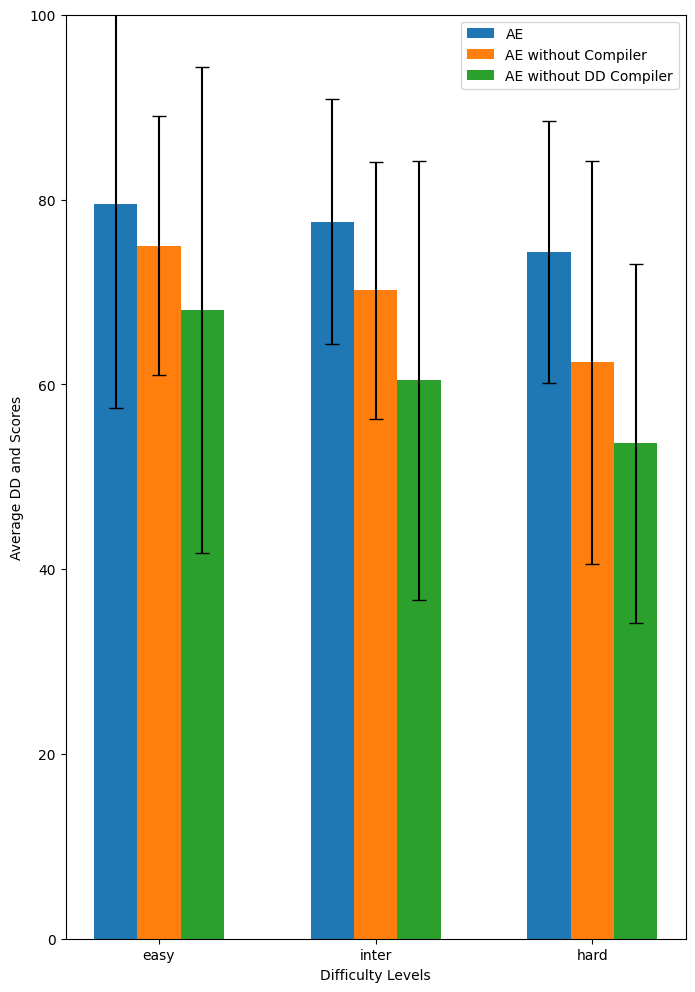

In [45]:
# Difficulty levels
difficulty_levels = ["easy", "inter", "hard"]

# Function to calculate average excluding -Infinity
def average(scores):
    valid_scores = [score for score in scores if not math.isinf(score)]
    return sum(valid_scores) / len(valid_scores) if valid_scores else float('nan')

# Function to calculate standard error
def standard_error(scores):
    valid_scores = [score for score in scores if not math.isinf(score)]
    if len(valid_scores) > 1:
        return stats.sem(valid_scores)
    else:
        return float('nan')

# Function to calculate confidence interval (95%)
def confidence_interval(sem, n):
    h = sem * stats.t.ppf((1 + 0.95) / 2., n-1)  # 95% confidence
    return h

# Calculate the average scores and confidence intervals for each setting and difficulty level
ae_avg = [average(data["ae"][level]["dd_score"]) for level in difficulty_levels]
ae_sem = [standard_error(data["ae"][level]["dd_score"]) for level in difficulty_levels]
ae_ci = [confidence_interval(sem, len(data["ae"][level]["dd_score"])) for sem, level in zip(ae_sem, difficulty_levels)]

ae_wo_compiler_avg = [average(data["ae_wo_compiler"][level]["dd_score"]) for level in difficulty_levels]
ae_wo_compiler_sem = [standard_error(data["ae_wo_compiler"][level]["dd_score"]) for level in difficulty_levels]
ae_wo_compiler_ci = [confidence_interval(sem, len(data["ae_wo_compiler"][level]["dd_score"])) for sem, level in zip(ae_wo_compiler_sem, difficulty_levels)]

ae_wo_dd_compiler_avg = [average(data["ae_wo_dd_compiler"][level]["dd_score"]) for level in difficulty_levels]
ae_wo_dd_compiler_sem = [standard_error(data["ae_wo_dd_compiler"][level]["dd_score"]) for level in difficulty_levels]
ae_wo_dd_compiler_ci = [confidence_interval(sem, len(data["ae_wo_dd_compiler"][level]["dd_score"])) for sem, level in zip(ae_wo_dd_compiler_sem, difficulty_levels)]

# X axis for difficulty levels
x = np.arange(len(difficulty_levels))

# Width of the bars
bar_width = 0.2

# Plotting the histograms for each setting
fig, ax = plt.subplots(figsize=(8, 12))

# Creating bars for each setting with error bars
ax.bar(x - bar_width, ae_avg, yerr=ae_ci, width=bar_width, label="AE", align="center", capsize=5)
ax.bar(x, ae_wo_compiler_avg, yerr=ae_wo_compiler_ci, width=bar_width, label="AE without Compiler", align="center", capsize=5)
ax.bar(x + bar_width, ae_wo_dd_compiler_avg, yerr=ae_wo_dd_compiler_ci, width=bar_width, label="AE without DD Compiler", align="center", capsize=5)

# Adding labels and titles
ax.set_xlabel("Difficulty Levels")
ax.set_ylabel("Average DD and Scores")
# ax.set_title("Average DD Scores by Difficulty Level for Different Settings")
ax.set_xticks(x)
ax.set_xticklabels(difficulty_levels)
ax.legend()

# Limiting the Y-axis to 100
ax.set_ylim(0, 100)

# Display the plot
plt.show()